In [1]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.integrate import quad
from scipy.misc import derivative
import matplotlib.pyplot as plt
from functools import partial

In [2]:
h = 1e-2
dx = 1e-6
a = 2

In [3]:
def V(x):
    return x**2*(np.pi + np.arctan(x))

def H(x, p):
    return p**2/2 + V(x)

def Hp(x, p):
    return p

def ode(t, y):
    x, p, Phi = y[0], y[1], y[2]

    return [
        p, 
        -2*x*(np.pi+np.arctan(x)) - x**2/(1+x**2),
        p*Hp(p, x) - H(p, x)
    ]

In [7]:
def p(alpha):
    return a  # On initial surface (t=0) p is const and equals a

def X(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[0][0]

def Phi(alpha, t):
    x_0 = alpha
    p_0 = a
    Phi_0 = 0  # Because of t = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])

    return sol.y[2][0]

def J(alpha, t):
    X_halfed = partial(X, t=t)
    return np.abs(derivative(X_halfed, alpha, dx=dx))

def S(alpha, t):
    return quad(lambda a: p(a) * J(a, t), 0, alpha)[0]

In [8]:
def psi(x, t):
    mu_t = 0
    m_n = 0
    A = 1
    
    return np.exp(1j/h*Phi(x, t) + 1j*np.pi/2*(mu_t - m_n)) * A/np.sqrt(J(x, t)) * np.exp(1j/h*S(x, t))

/usr/local/Cellar/ipython/7.8.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:27: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.


*
*
*
*
*
*
*
*
*
*


/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


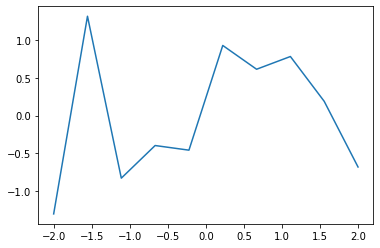

In [9]:
t = 1
xs = np.linspace(-2, 2, 10)

psis = []
for x in xs:
    P = psi(x, t)
    print('*')
    psis.append(P)
    
plt.plot(xs, psis)

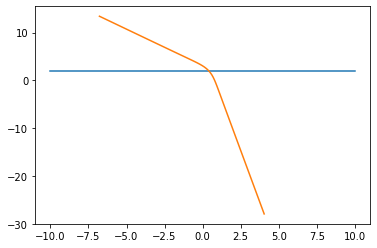

In [6]:
# Вращение лагранжевой поверхности в зависимости от времени

t = 0.4
a = 2
xs = np.linspace(-10, 10, 100)

rks = []
for x in xs:
    x_0 = x
    p_0 = a
    Phi_0 = 0
    t_span = [0, t]
    sol = solve_ivp(ode, t_span, [x_0, p_0, Phi_0], t_eval=[t])
    rks.append([sol.y[0][0], sol.y[1][0]])
    
plt.plot(xs, [a for _ in xs])
plt.plot([pair[0] for pair in rks], [pair[1] for pair in rks])